`Outline`

-Modules

-Data Reading

-Stats Modelling (Linear Regression)

-Sklearn Modelling (Linear Regression)

-Assumption Checking

-References

---


### Modules

In [17]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt
 

### Data Reading
Data Source: https://www.kaggle.com/datasets/gunhee/koreahousedata/version/1 

In [18]:
d = pd.read_csv(r'C:\Users\Asus\Desktop\Courses\Codes\Practice\Daegu_Real_Estate_data.csv') 
t = list(d.columns)
t[4] = 'Size' 
d.columns = t 
d.head() 


,SalePrice,YearBuilt,YrSold,MonthSold,Size,Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


# Stats Model

In [19]:
import statsmodels.formula.api as smf 

In [20]:

# Initialise and fit linear regression model using `statsstats_models`
stats_model = smf.ols('SalePrice ~ Size', data=d)
stats_model = stats_model.fit() 
stats_model.params 

Intercept    35905.345584
Size           193.929202
dtype: float64

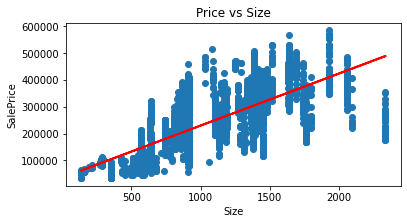

In [21]:
sales_pred_stats = stats_model.predict()
y = d['SalePrice'] 
x = d['Size']

# Plot regression against actual data
plt.figure(figsize=(6, 3))
plt.plot(x, y, 'o')           # scatter plot showing actual data
plt.plot(x, sales_pred_stats, 'r', linewidth=2)   # regression line
plt.xlabel('Size')
plt.ylabel('SalePrice')
plt.title('Price vs Size')

plt.show()

# Sklearn

In [22]:
from sklearn.linear_model import LinearRegression 

In [23]:
# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['Size']
X = d[predictors]
y = d['SalePrice'] 

# Initialise and fit model
lm = LinearRegression()
sklearn_model = lm.fit(X, y) 

In [24]:
print(f'alpha = {sklearn_model.intercept_}')
print(f'betas = {sklearn_model.coef_}')

alpha = 35905.345584455325
betas = [193.92920171]


In [25]:
sklearn_model.predict(X) 

array([193763.71577673, 149741.78698847, 149741.78698847, ...,
       204235.8926691 , 293249.39625418, 204235.8926691 ])

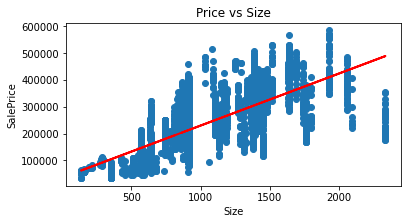

In [26]:
predictors = ['Size']
X = d[predictors] 
sales_pred_sklearn = sklearn_model.predict(X)

y = d['SalePrice'] 
x = d['Size']

# Plot regression against actual data
plt.figure(figsize=(6, 3))
plt.plot(x, y, 'o')           # scatter plot showing actual data
plt.plot(x, sales_pred_sklearn, 'r', linewidth=2)   # regression line
plt.xlabel('Size')
plt.ylabel('SalePrice')
plt.title('Price vs Size')

plt.show() 

# Comparision

In [27]:
w_stat, w_p = stats.wilcoxon(sales_pred_stats, sales_pred_sklearn) 
w_p 

0.0

# Assumption Check
* Assumption #1: There exists a linear relationship between the predictor variables and the response variable.
* Assumption #2: Independence of residuals.
* Assumption #3: Homoscedasticity of residuals.
* Assumption #4: Normality of residuals.
* Assumption #5: Verify that multicollinearity doesn’t exist among predictor variables.


### Assumtion I

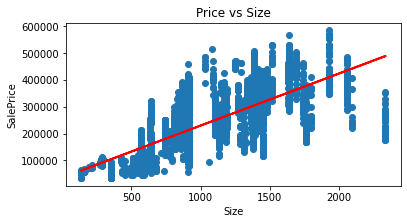

In [28]:
sales_pred_stats = stats_model.predict()
y = d['SalePrice'] 
x = d['Size']

# Plot regression against actual data
plt.figure(figsize=(6, 3))
plt.plot(x, y, 'o')           # scatter plot showing actual data
plt.plot(x, sales_pred_stats, 'r', linewidth=2)   # regression line
plt.xlabel('Size')
plt.ylabel('SalePrice')
plt.title('Price vs Size')

plt.show()

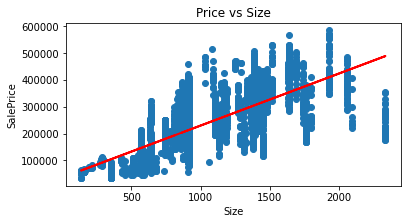

In [29]:
predictors = ['Size']
X = d[predictors] 
sales_pred_sklearn = sklearn_model.predict(X)

y = d['SalePrice'] 
x = d['Size']

# Plot regression against actual data
plt.figure(figsize=(6, 3))
plt.plot(x, y, 'o')           # scatter plot showing actual data
plt.plot(x, sales_pred_sklearn, 'r', linewidth=2)   # regression line
plt.xlabel('Size')
plt.ylabel('SalePrice')
plt.title('Price vs Size')

plt.show() 

### Assumption II

In [30]:
from statsmodels.stats.stattools import durbin_watson

# Stats Model Residuals 
stats_model.resid

# Sklearn Residuals 
X = d[predictors]
y = d['SalePrice']  
sklearn_model.fit(X, y)
prediction = sklearn_model.predict(X)
residuals = (y - prediction) 

#perform Durbin-Watson test
durbin_watson(stats_model.resid ), durbin_watson(residuals)

(0.8173787638225775, 0.8173787638225781)

`!` `If there is a problem:` 
1. For positive serial correlation, consider adding lags of the dependent and/or independent variable to the model. 

2. For negative serial correlation, check to make sure that none of your variables are overdifferenced. 

3. For seasonal correlation, consider adding seasonal dummy variables to the model.

### Assumption III 
* `Breusch-Pagan` 

 If p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [31]:
from statsmodels.compat import lzip 
import statsmodels.stats.api as sms 

# Performing Bresuch-Pagan test 
def perform_pagan(Model= stats_model):  
    names = ['Lagrange multiplier statistic', 'p-value', 
            'f-value', 'f p-value'] 
    test = sms.het_breuschpagan( Model.resid, Model.model.exog ) 
    return( lzip(names, test) ) 

perform_pagan(Model = stats_model) 


[('Lagrange multiplier statistic', 676.8926144297108),
 ('p-value', 3.1672130782771033e-149),
 ('f-value', 764.5068103906295),
 ('f p-value', 2.5177783670980246e-158)]

How To Deal?
1. Transform the dependent variable. One way to fix heteroscedasticity is to transform the dependent variable in some way. One common transformation is to simply take the log of the dependent variable.

2. Redefine the dependent variable. Another way to fix heteroscedasticity is to redefine the dependent variable. One common way to do so is to use a rate for the dependent variable, rather than the raw value.

3. Use weighted regression. Another way to fix heteroscedasticity is to use weighted regression. This type of regression assigns a weight to each data point based on the variance of its fitted value. When the proper weights are used, this can eliminate the problem of heteroscedasticity.

Source: https://www.statology.org/breusch-pagan-test-python/ 

### Assumption IV 
! Use: The Jarque-Bera Test is typically used for large datasets (n > 2000) in which other normality tests (like the Shapiro-Wilk test) are unreliable.
Source: https://www.statology.org/jarque-bera-test-python/ 

In [57]:
stats.jarque_bera(d['Size'])  , stats.jarque_bera(d['SalePrice']) 

(Jarque_beraResult(statistic=985.9442403655127, pvalue=0.0),
 Jarque_beraResult(statistic=242.19338847760963, pvalue=0.0))

### Assumption V

In [54]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [56]:

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('SalePrice ~ Size', data=d, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,7.243337,Intercept
1,1.000000,Size


* A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.

* A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.

* A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

# Rerefences:

Source: https://www.statology.org/linear-regression-python/ 